In [69]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score, roc_auc_score, auc, precision_recall_curve, roc_curve

1

In [5]:
df = pd.read_csv('KM-13-3.csv')
df.head()

,GT,Model_1_0,Model_2_1
0,1,0.014745,0.996526
1,0,0.999735,0.003289
2,0,0.999786,0.125449
3,0,0.999695,0.000858
4,1,0.022115,0.786606


2

In [9]:
(df['GT']).value_counts()

GT
1    2200
0    2200
Name: count, dtype: int64

3

preprocessing

In [12]:
for i in 'Accuracy, Precision, Recall, F-Scores, Matthews Correlation Coefficient, Balanced Accuracy'.split(', '):
  print(f"diction['{i}'] = ")

diction['Accuracy'] = 
diction['Precision'] = 
diction['Recall'] = 
diction['F-Scores'] = 
diction['Matthews Correlation Coefficient'] = 
diction['Balanced Accuracy'] = 


In [10]:
df['Model_1_1'] = 1 - df['Model_1_0']

a

In [58]:
def get_metrics(trues, prediction, treshhold):
  diction = {}
  diction['treshhold'] = [treshhold]
  diction['number'] = prediction.sum()
  diction['Accuracy'] = [accuracy_score(trues, prediction)]
  diction['Precision'] = [precision_score(trues, prediction)]
  diction['Recall'] = [recall_score(trues, prediction)]
  diction['F-Scores'] = [f1_score(trues, prediction)]
  diction['Matthews Correlation Coefficient'] = [matthews_corrcoef(trues, prediction)]
  diction['Balanced Accuracy'] = [balanced_accuracy_score(trues, prediction)]
  return pd.DataFrame(diction)

def get_results(df):
  columns = ['Model_1_1', 'Model_2_1']
  res_df = None
  for m in columns:
    youden = -1
    threshholds = np.arange(0, 1.001, 0.02)
    this_model_df = None

    for threshold in threshholds:
      trues = df['GT']
      prediction = (df[m] > threshold).astype('int8')
      new_df = get_metrics(trues, prediction, threshold)
      this_model_df = pd.concat([this_model_df, new_df])

      youden = max(youden, recall_score(trues, prediction) + recall_score(trues, prediction, pos_label=0) - 1)

    # Concatenate all rows into one row with arrays
    concat_data = this_model_df.apply(lambda x: [x.values.tolist()], axis=0)
    # Convert the concatenated data to a DataFrame
    this_model_df = pd.DataFrame(concat_data)
    this_model_df['Youden’s J statistics'] = [youden]

    this_model_df['Area Under Curve for Receiver Operation Curve'] = [roc_auc_score(df['GT'], df[m])]

    precision, recall, thresholds = precision_recall_curve(df['GT'], df[m], pos_label=1)
    this_model_df['Area Under Curve for Precision-Recall Curve'] = [auc(recall, precision)]

    this_model_df.rename({0: m}, inplace=True)
    res_df = pd.concat([res_df, this_model_df])
  return res_df.T


In [59]:
result = get_results(df)
result

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model_1_1,Model_2_1
treshhold,"[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,...","[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,..."
number,"[4400, 2327, 2303, 2282, 2276, 2267, 2262, 225...","[4223, 3499, 3310, 3021, 3021, 3016, 3016, 232..."
Accuracy,"[0.5, 0.9697727272727272, 0.9752272727272727, ...","[0.5402272727272728, 0.7047727272727272, 0.747..."
Precision,"[0.5, 0.9441340782122905, 0.9539730785931394, ...","[0.5209566658773384, 0.6287510717347814, 0.664..."
Recall,"[1.0, 0.9986363636363637, 0.9986363636363637, ...","[1.0, 1.0, 0.9995454545454545, 0.9986363636363..."
F-Scores,"[0.6666666666666666, 0.9706207201237023, 0.975...","[0.6850381441693912, 0.7720652746095806, 0.798..."
Matthews Correlation Coefficient,"[0.0, 0.9411148666083661, 0.9514979317393185, ...","[0.2047274572564139, 0.5074466902735328, 0.572..."
Balanced Accuracy,"[0.5, 0.9697727272727272, 0.9752272727272727, ...","[0.5402272727272728, 0.7047727272727273, 0.747..."
Youden’s J statistics,0.981818,0.984091
Area Under Curve for Receiver Operation Curve,0.996785,0.997038


b

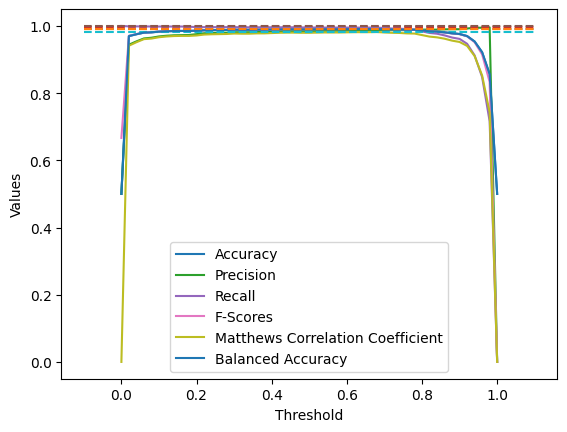

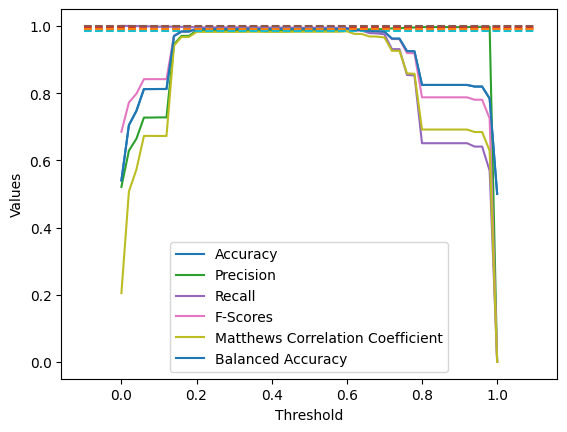

In [60]:
for m in result.columns:
  fig, ax = plt.subplots()
  metrics = list(result.index)
  xs = result.loc['treshhold', m]
  metrics.remove('treshhold')
  metrics.remove('number')

  for i in metrics:
    ys = result.loc[i, m]
    if isinstance(ys, float):
      pass
    else:
      plt.plot(xs, ys, label=i)
      plt.plot([-0.1, 1.1], [np.max(ys)]*2, '--')
  ax.set_xlabel('Threshold')
  ax.set_ylabel('Values')
  plt.legend()
  plt.show()

c

<ipython-input-67-d022612b4cd9>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(result.index))


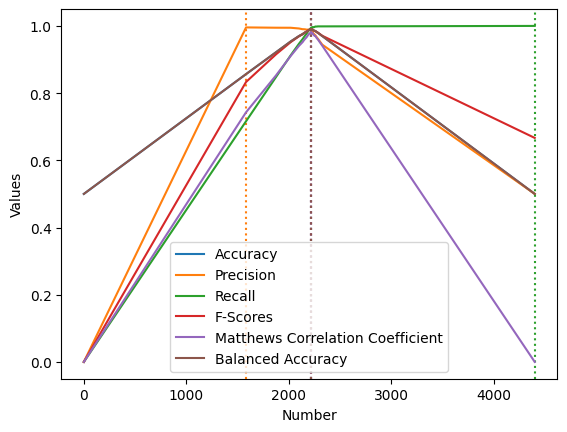

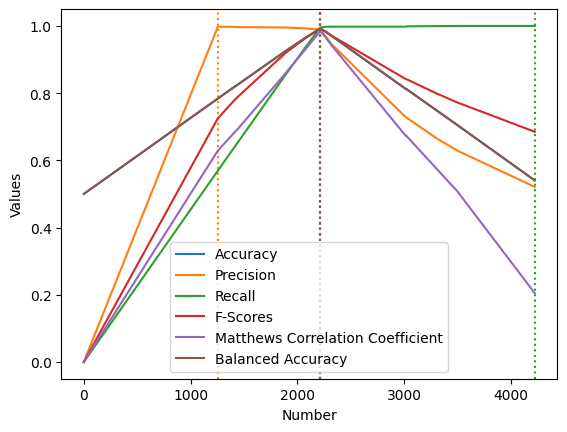

In [67]:
# Define a color map
color_map = plt.cm.get_cmap('tab10', len(result.index))

for m_idx, m in enumerate(result.columns):
    fig, ax = plt.subplots()
    metrics = list(result.index)
    xs = result.loc['number', m]
    metrics.remove('treshhold')
    metrics.remove('number')

    for i_idx, i in enumerate(metrics):
        ys = result.loc[i, m]
        if isinstance(ys, float):
            continue
        color = color_map(i_idx)  # Get a color from the color map
        plt.plot(xs, ys, label=i, color=color)
        plt.plot([-0.1, 1.1], [np.max(ys)]*2, '--', color=color)
        maxer = np.argmax(ys)
        plt.axvline(xs[maxer], linestyle=':', color=color)

    ax.set_xlabel('Number')
    ax.set_ylabel('Values')
    plt.legend()
    plt.show()

Metrics for Model_1


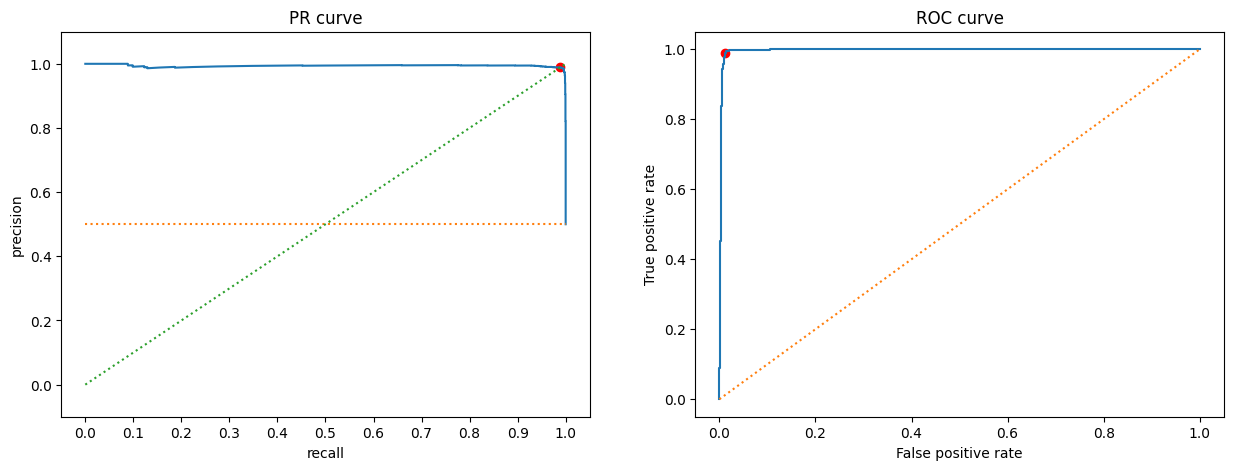

Metrics for Model_2


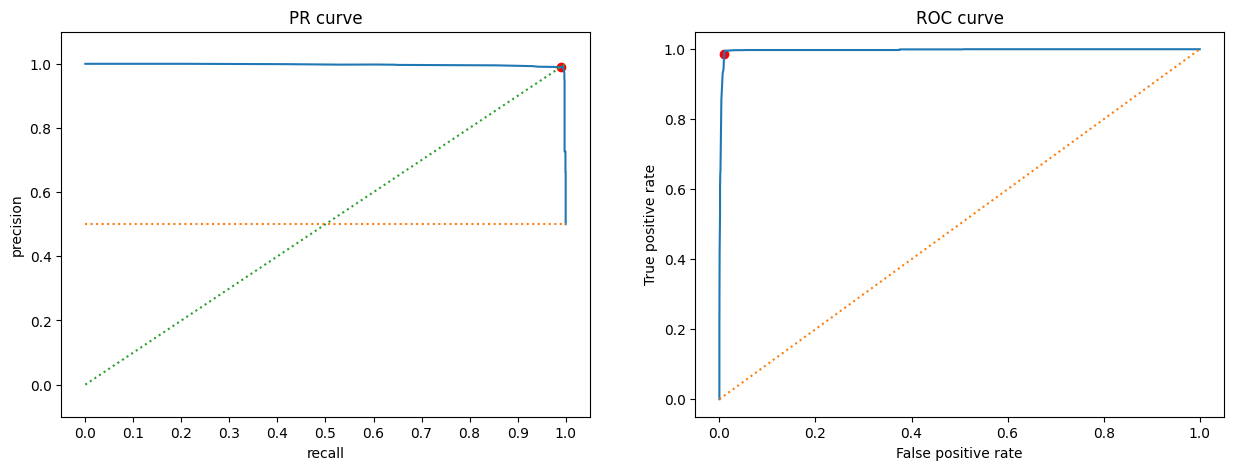

In [74]:
from scipy.interpolate import interp1d
from scipy.optimize import brentq

def intersection(x1, y1, x2, y2):
  f1 = interp1d(x1, y1)
  f2 = interp1d(x2, y2)

  intersection_x = brentq(lambda x: f1(x) - f2(x), 0, 1)

  intersection_y = f1(intersection_x)

  return intersection_x, intersection_y



for m in ['Model_1_1', 'Model_2_1']:
  fig, ax = plt.subplots(ncols = 2, figsize=(15, 5))
  precision, recall, thresholds = precision_recall_curve(df['GT'], df[m], pos_label=1)
  ax[0].plot(recall, precision)
  ax[0].set_ylabel('precision')
  ax[0].set_xlabel('recall')
  ax[0].set_title('PR curve')
  ax[0].set_ylim(-0.1, 1.1)
  ax[0].set_xticks(np.arange(0, 1.1, 0.1))
  intersection_x, intersection_y = intersection(recall, precision, [0, 1], [0, 1])
  ax[0].scatter(intersection_x, intersection_y, color='r', label='Optimal threshold')
  prob_1 = (df['GT'] == 1).mean()
  ax[0].plot([0,1], [prob_1, prob_1], ':')
  ax[0].plot([0,1], [0, 1], ':')

  fpr, tpr, thresholds = roc_curve(df['GT'], df[m], pos_label=1)
  ax[1].plot(fpr, tpr)
  ax[1].set_ylabel('True positive rate')
  ax[1].set_xlabel('False positive rate')
  ax[1].set_title('ROC curve')
  ax[1].plot([0,1], [0, 1], ':')

  x_min = np.argmin(np.abs(tpr + fpr - 1))

  ax[1].scatter(fpr[x_min], tpr[x_min], color='red')
  print(f'Metrics for {m[:-2]}')
  plt.show()

4

Обидві моделі зроблені дуже добре, але якщо оцінювати, то спираючись на метрики, як auc, youden score - 2 модель трохи краще, але майже на рівні статистичної похибки

5

In [75]:
dob = '03-06'  # Example date of birth in DD-MM format
month = int(dob.split('-')[1])
K = month % 4  # Calculate K
percentage_to_remove = 50 + 10 * K
class_1_indices = df[df['GT'] == 1].index
num_to_remove = int(len(class_1_indices) * percentage_to_remove / 100)

removed_indices = np.random.choice(class_1_indices, num_to_remove, replace=False)
new_data = df.drop(removed_indices)

6

In [77]:
class_counts_after_removal = new_data['GT'].value_counts()
percentage_removed = (num_to_remove / len(class_1_indices)) * 100

print(f"Percentage of removed class 1 objects: {percentage_removed:.2f}%")
print(f"Class counts after removal:\n{class_counts_after_removal}")

Percentage of removed class 1 objects: 70.00%
Class counts after removal:
GT
0    2200
1     660
Name: count, dtype: int64


7

In [78]:
result = get_results(new_data)
result

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model_1_1,Model_2_1
treshhold,"[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,...","[0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14,..."
number,"[2860, 788, 764, 743, 738, 729, 724, 721, 720,...","[2683, 1959, 1771, 1483, 1483, 1479, 1479, 785..."
Accuracy,"[0.23076923076923078, 0.9538461538461539, 0.96...","[0.29265734265734267, 0.5458041958041958, 0.61..."
Precision,"[0.23076923076923078, 0.8350253807106599, 0.86...","[0.24599329109206114, 0.33690658499234305, 0.3..."
Recall,"[1.0, 0.996969696969697, 0.996969696969697, 0....","[1.0, 1.0, 1.0, 0.9984848484848485, 0.99848484..."
F-Scores,"[0.375, 0.9088397790055248, 0.9241573033707865...","[0.3948549207298834, 0.5040091638029783, 0.542..."
Matthews Correlation Coefficient,"[0.0, 0.8844474566098592, 0.9034624718301302, ...","[0.1406814785950143, 0.3714546546888946, 0.429..."
Balanced Accuracy,"[0.5, 0.968939393939394, 0.9743939393939394, 0...","[0.5402272727272728, 0.7047727272727273, 0.747..."
Youden’s J statistics,0.977727,0.980455
Area Under Curve for Receiver Operation Curve,0.996446,0.99669


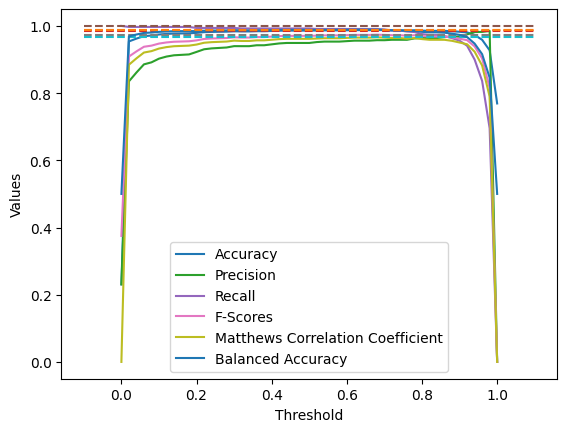

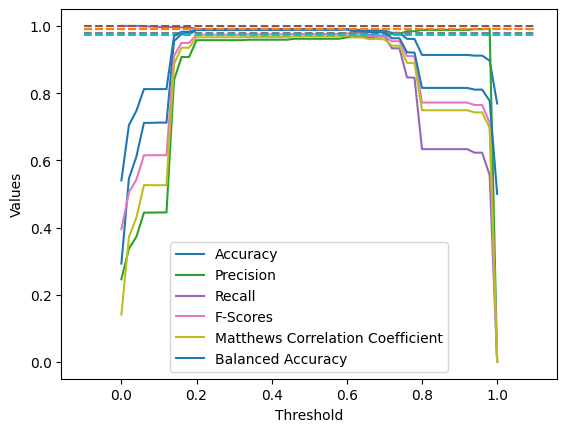

In [79]:
for m in result.columns:
  fig, ax = plt.subplots()
  metrics = list(result.index)
  xs = result.loc['treshhold', m]
  metrics.remove('treshhold')
  metrics.remove('number')

  for i in metrics:
    ys = result.loc[i, m]
    if isinstance(ys, float):
      pass
    else:
      plt.plot(xs, ys, label=i)
      plt.plot([-0.1, 1.1], [np.max(ys)]*2, '--')
  ax.set_xlabel('Threshold')
  ax.set_ylabel('Values')
  plt.legend()
  plt.show()

<ipython-input-80-d022612b4cd9>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', len(result.index))


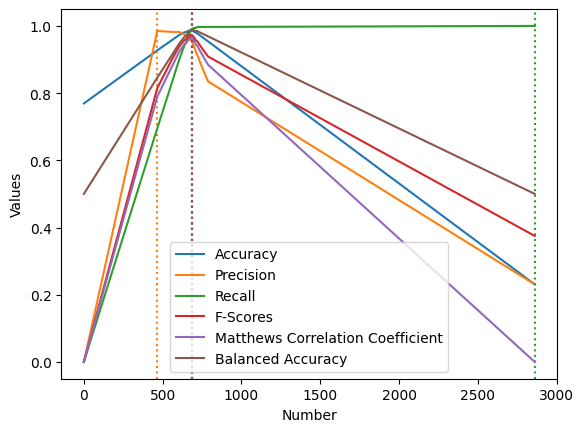

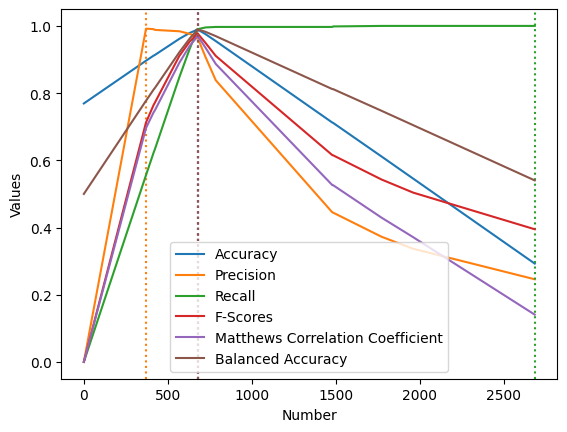

In [80]:
# Define a color map
color_map = plt.cm.get_cmap('tab10', len(result.index))

for m_idx, m in enumerate(result.columns):
    fig, ax = plt.subplots()
    metrics = list(result.index)
    xs = result.loc['number', m]
    metrics.remove('treshhold')
    metrics.remove('number')

    for i_idx, i in enumerate(metrics):
        ys = result.loc[i, m]
        if isinstance(ys, float):
            continue
        color = color_map(i_idx)  # Get a color from the color map
        plt.plot(xs, ys, label=i, color=color)
        plt.plot([-0.1, 1.1], [np.max(ys)]*2, '--', color=color)
        maxer = np.argmax(ys)
        plt.axvline(xs[maxer], linestyle=':', color=color)

    ax.set_xlabel('Number')
    ax.set_ylabel('Values')
    plt.legend()
    plt.show()

Metrics for Model_1


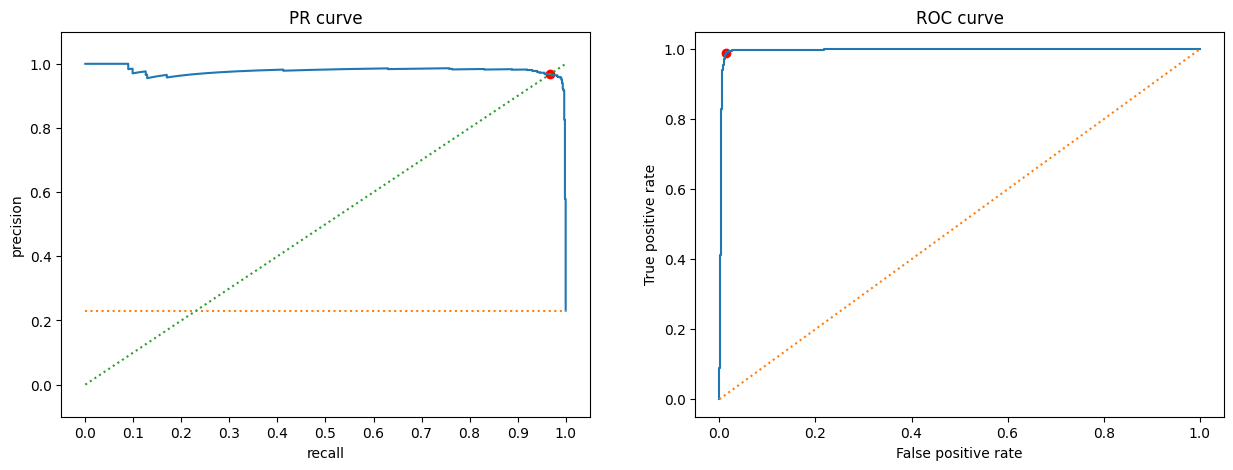

Metrics for Model_2


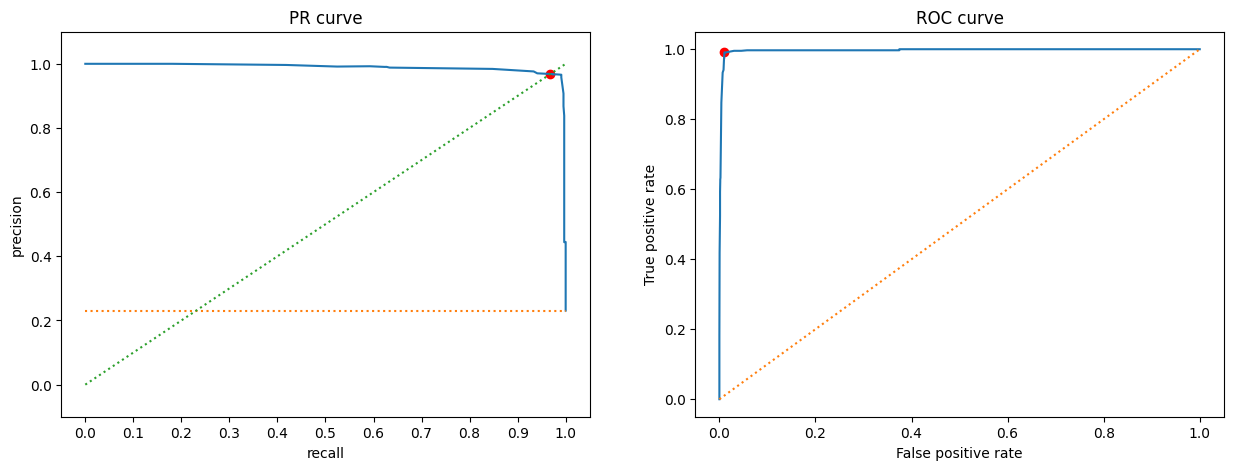

In [81]:
for m in ['Model_1_1', 'Model_2_1']:
  fig, ax = plt.subplots(ncols = 2, figsize=(15, 5))
  precision, recall, thresholds = precision_recall_curve(new_data['GT'], new_data[m], pos_label=1)
  ax[0].plot(recall, precision)
  ax[0].set_ylabel('precision')
  ax[0].set_xlabel('recall')
  ax[0].set_title('PR curve')
  ax[0].set_ylim(-0.1, 1.1)
  ax[0].set_xticks(np.arange(0, 1.1, 0.1))
  intersection_x, intersection_y = intersection(recall, precision, [0, 1], [0, 1])
  ax[0].scatter(intersection_x, intersection_y, color='r', label='Optimal threshold')
  prob_1 = (new_data['GT'] == 1).mean()
  ax[0].plot([0,1], [prob_1, prob_1], ':')
  ax[0].plot([0,1], [0, 1], ':')

  fpr, tpr, thresholds = roc_curve(new_data['GT'], new_data[m], pos_label=1)
  ax[1].plot(fpr, tpr)
  ax[1].set_ylabel('True positive rate')
  ax[1].set_xlabel('False positive rate')
  ax[1].set_title('ROC curve')
  ax[1].plot([0,1], [0, 1], ':')

  x_min = np.argmin(np.abs(tpr + fpr - 1))

  ax[1].scatter(fpr[x_min], tpr[x_min], color='red')
  print(f'Metrics for {m[:-2]}')
  plt.show()

8

Друга модель залишається кращою

9

Після отримання незбалансованого датасету графіки першої моделі стали виглядати гірше